In [37]:
#install.packages('dplyr')

Instalowanie pakietu w 'C:/Users/admin/AppData/Local/R/win-library/4.2'
(ponieważ 'lib' nie jest określony)



pakiet 'dplyr' został pomyślnie rozpakowany oraz sumy MD5 zostały sprawdzone

Pobrane pakiety binarne są w
	C:\Users\admin\AppData\Local\Temp\RtmpgHYIyv\downloaded_packages


## CEL I PYTANIA CZYLI DOKAD ZMIERZAMY

How did the popularity of eBooks change in the last decade? - CZAS VS COUNT <br>
num_pages VS count <br>
How are average rating and popularity related? AVG VS COUNT <br>
publisher VS count  ---> <br>
Top 10 publishers and their popularity + top 10 authors czyli publishers vs rating count i avg <br>

**CEL** -  analiza zainteresowań czytleników względem różnych aspektów książek kryminalnych tj. ilości stron, wydawnictwa, autora i czasu XD




In [77]:
library('dplyr')
library(ggplot2)

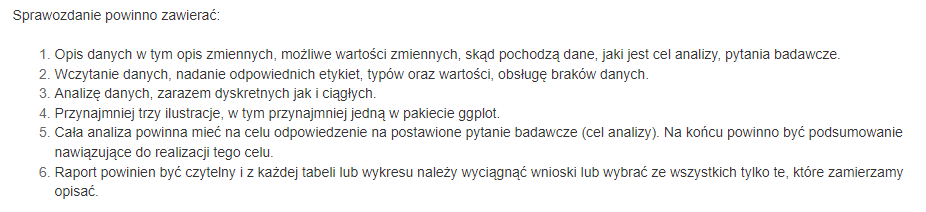

In [57]:
plik <- read.csv('best_crime_and_mystery_books.csv', na.strings=c("", "NA"))
plik

book_rank,id,title,book_author,publication_year,publisher,language_code,num_pages,average_rating,ratings_count
<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<int>
1,2429135,"The Girl with the Dragon Tattoo (Millennium, #1)",Stieg Larsson,2008,Knopf,eng,465,4.13,2323151
2,16299,And Then There Were None,Agatha Christie,2004,St. Martin's Press,eng,264,4.26,642138
3,960,"Angels & Demons (Robert Langdon, #1)",Dan Brown,2006,Pocket Books,eng,736,3.90,2450604
4,17899948,Rebecca,Daphne du Maurier,2013,"Little, Brown and Company",eng,449,4.23,200400
5,168642,In Cold Blood,Truman Capote,1994,Vintage,eng,343,4.07,463437
6,22034,The Godfather,Mario Puzo,2002,NAL,eng,448,4.36,287416
7,12232938,The Lovely Bones,Alice Sebold,2006,"Little, Brown and Company",eng,372,3.81,1875378
8,119073,The Name of the Rose,Umberto Eco,1994,Harvest Books,eng,536,4.12,244807
9,5358,The Firm,Robin Waterfield,2000,Addison Wesley Publishing Company,eng,76,4.02,544744


In [68]:
plik2 <- na.omit(plik)

In [67]:
plik %>% count(publisher, sort = TRUE)

publisher,n
<chr>,<int>
NA,836
Minotaur Books,83
Bantam,81
Ballantine Books,79
Grand Central Publishing,73
G.P. Putnam's Sons,69
Vintage Crime/Black Lizard,69
Berkley,64
Pocket Books,61


In [69]:
plik2 %>% count(publisher, sort = TRUE)

publisher,n
<chr>,<int>
Minotaur Books,83
Bantam,81
Ballantine Books,77
Grand Central Publishing,73
G.P. Putnam's Sons,69
Vintage Crime/Black Lizard,69
Berkley,63
Penguin Books,58
Pocket Books,55


In [46]:
bb <- plik %>% count(language_code, sort = TRUE)
bb[bb$n > 1,]

,language_code,n
,<chr>,<int>
1,eng,4772
2,en-US,244
3,en-GB,119
4,fre,22
5,spa,22
6,nl,16
7,swe,12
8,en-CA,11
9,por,9


In [48]:
cc <- plik %>% count(book_author, sort = TRUE)
cc#[cc$n > 1,]

,book_author,n
,<chr>,<int>
1,Agatha Christie,93
2,James Patterson,36
3,Arthur Conan Doyle,31
4,Ruth Rendell,29
5,Harlan Coben,26
6,Isaac Asimov,24
7,John Sandford,24
8,Sidney Sheldon,24
9,Georges Simenon,23


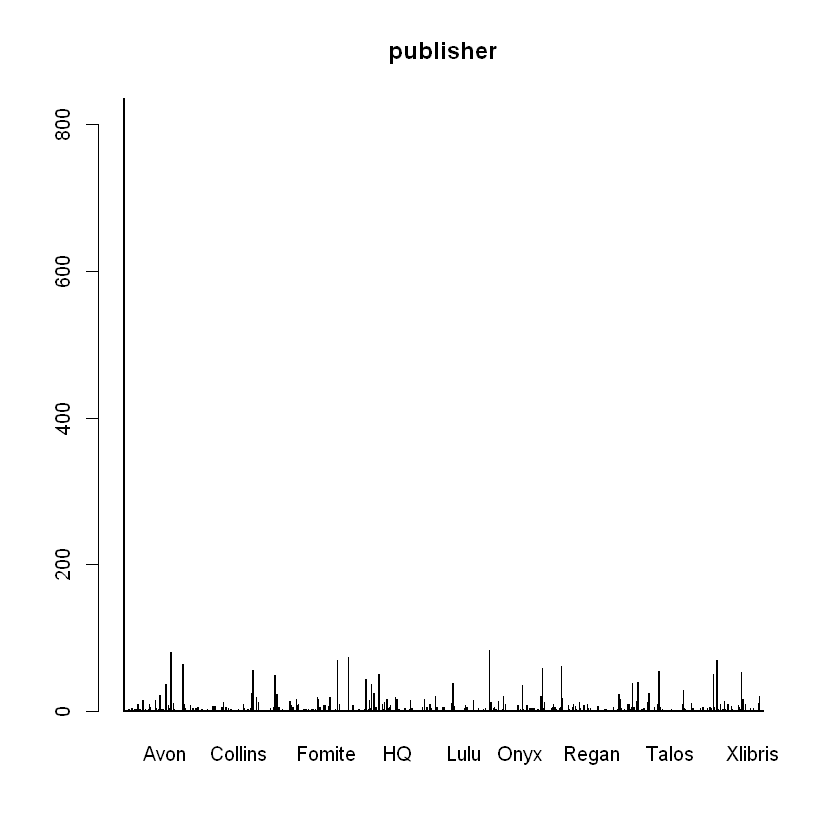

In [24]:
counts <- table(plik$publisher)
barplot(counts, main = 'publisher')

In [14]:
df1 <- na.omit(plik$num_pages)
df1

length(plik$num_pages)
length(df1)

[1]   465   264   736   449   343   448   372   536    76   369   415   416
  [13]   487   498   231   320   213   348   431   421   406   386   144   515
  [25]   821   121   308   123   672   424  1276   263   342   528   404   400
  [37]   226   424   704   671   510   306   358   235   469   528   320   433
  [49]   347   413   339   379   254   341   309   566   447   256   449   348
  [61]   201   416   560   389   482   337   460   556   256   374   349   559
  [73]   479   370   210   509   192   115   116   292   399   432   212   352
  [85]   352   404   280   384   304   240   326   480   384   623   689   244
  [97]   263   325   416   691   456   250   252   456   254   213   194   325
 [109]   218   324   362   281   309   384   378   197   430   192   303   196
 [121]   121   279   532   304   446   404   548   288   418  1796   356   414
 [133]   208   302   228   334   991   214   636   129   278   359   352   256
 [145]   299   224   224   283   360   393   456   510   388   384   293   550
 [157]   451   306   310   329   394   272   637   295   384   220   364   197
 [169]   472   521   232   285   303   592   279   606   285   592   455   374
 [181]   193   259   432   342   237   288   288   580   381   402   373   276
 [193]   214   370   311   304   424   389   176   277   355   368   224   338
 [205]   224   849   289   176   224   218   458   408   244   370   282   242
 [217]  1207   421   288   648   432   432   320   684   182   632   384   368
 [229]   327   308   336   292   400   288   208   512   480   612   311   182
 [241]   358   336   464   318   123   288   261   399   501   548   400   509
 [253]   370   314   523    52   352   624   480   192   467    73   418   321
 [265]   289   182   400   452   401   208   336   385   483   336   318   400
 [277]   218   274   563   288   208   192   297   416   180   224   141   354
 [289]   304   656   206   880   472   193   320   304   511   288   294   416
 [301]   160    23   387   274   241   365   464   416   259   288   393   288
 [313]   592   432   320   278   336   326   218   306   366   160   400   278
 [325]   352   375   384   272   448   344   143   301   399   535   503   446
 [337]   293   390   304   351   224   272   266   390   352   283   600   288
 [349]   594   216   335   320   308   321   368   362   421   188   304   215
 [361]   677   384   348   400   374   292   667   293   334   310   288   432
 [373]   307   401   783   224   208   224   421   208   340   304   147   334
 [385]   206   358   411   304   369   688   254   208   208   288    54   352
 [397]   123   436   204   393   260   394   208   368   352   704   325   179
 [409]   290    48   318   295   165   262   406   480   461   275   372   327
 [421]   294   432   640   267   336   320   352   262   310   422   436   336
 [433]   374   304   331   224   291   198   503   496   406   294   339   329
 [445]   126   284   216   268   293   136   209   128   277   387   418   451
 [457]    24   288   240   320   219   313   200   320   256   287   443   304
 [469]   384   486   242   316   378   386  1116   334   260   192   421   184
 [481]   224   352   468   318   290   500   266   207   191   348   704   374
 [493]   288   184   546   897   259   275   300   208   533   629   419   165
 [505]   160   434   422   417   208   240   427   322   384   489   323   410
 [517]   589   244   269   134   313   484   796   787   452   304   341   312
 [529]   274   455   397   224   305   432   506   503   448   189   336   464
 [541]  1463   496   336   256   272   144   180   103   371   432   325   612
 [553]   307   278   272   324   208   303   340   204   504   295   288   372
 [565]   336   320   116   220   303   352   207   103   496   371   435   416
 [577]   373   188   743   268    32   174    56   245   243   246   165   244
 [589]   437   448   448   288   352    85   376   262   312   384   528   400
 [601]   176   368   564   320   304   208   307   16

[1] 5281

[1] 4467

Warning message:
"Removed 2 rows containing missing values (stat_boxplot)."


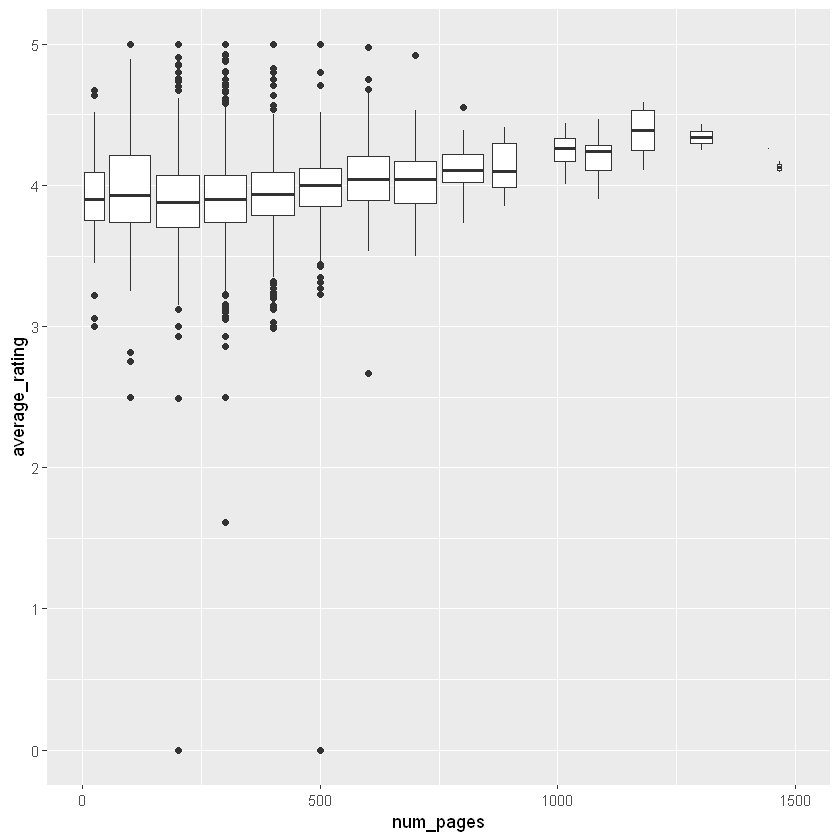

In [98]:
p <- ggplot(plik2, aes(x=num_pages, y=average_rating)) + 
  geom_boxplot(aes(group = cut_width(num_pages, 100))) + scale_x_continuous(limits=c(0,1500))

p
#boxplot(df1, breaks=100)

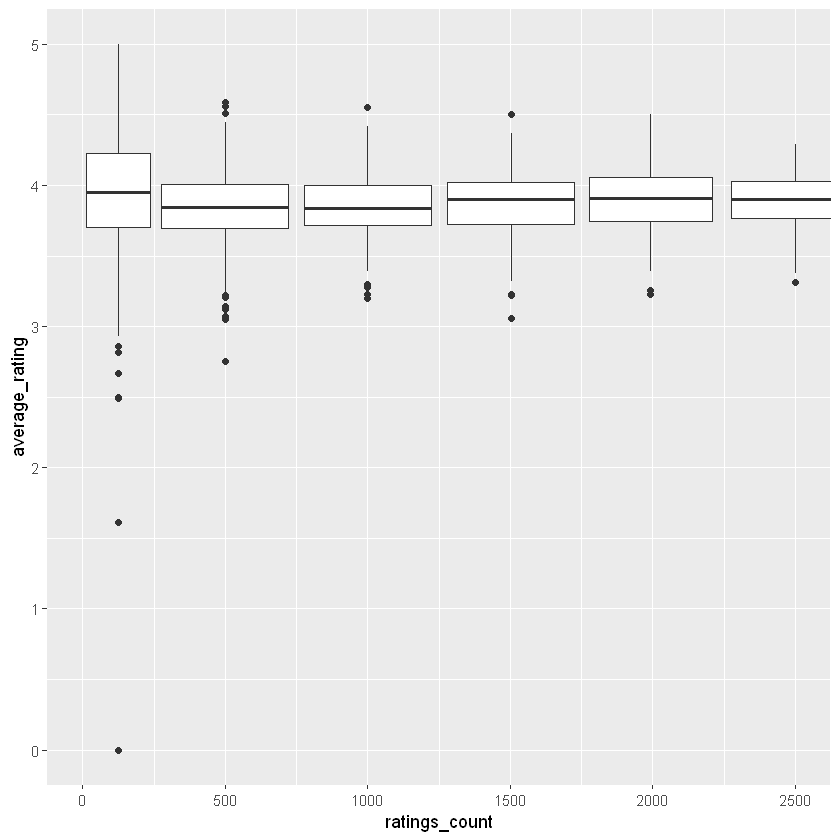

In [112]:
p <- ggplot(plik2, aes(x=ratings_count, y=average_rating)) + 
  geom_boxplot(aes(group = cut_width(ratings_count, 500))) + coord_cartesian(xlim=c(0,2500))

p